<a href="https://colab.research.google.com/github/subo-rodrigo/computer_vision_assig_249324H/blob/main/uom_assi_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

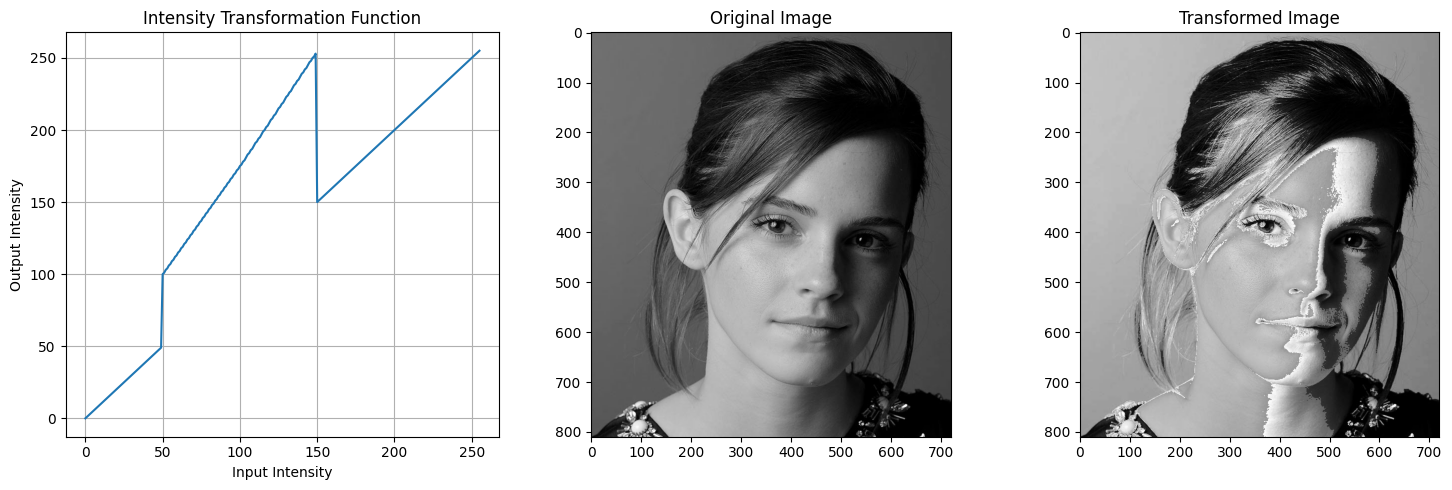

In [15]:
####1 Question
def custom_intensity_transform(image):
    # Define transformation points
    input_points = np.array([0, 50, 50,100, 150, 150,200, 255])
    output_points = np.array([0, 50,100, 175, 255, 150,200, 255])
    lut = np.interp(np.arange(256), input_points, output_points).astype(np.uint8)

    transformed = cv2.LUT(image, lut)
    return transformed, lut


image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/uom_cv/a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)
transformed_image, lut = custom_intensity_transform(image)


plt.figure(figsize=(15, 5))

# Intensity transformation graph
plt.subplot(131)
plt.plot(range(256), lut)
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)

# Original image
plt.subplot(132)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Transformed image
plt.subplot(133)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')

plt.tight_layout()
plt.show()

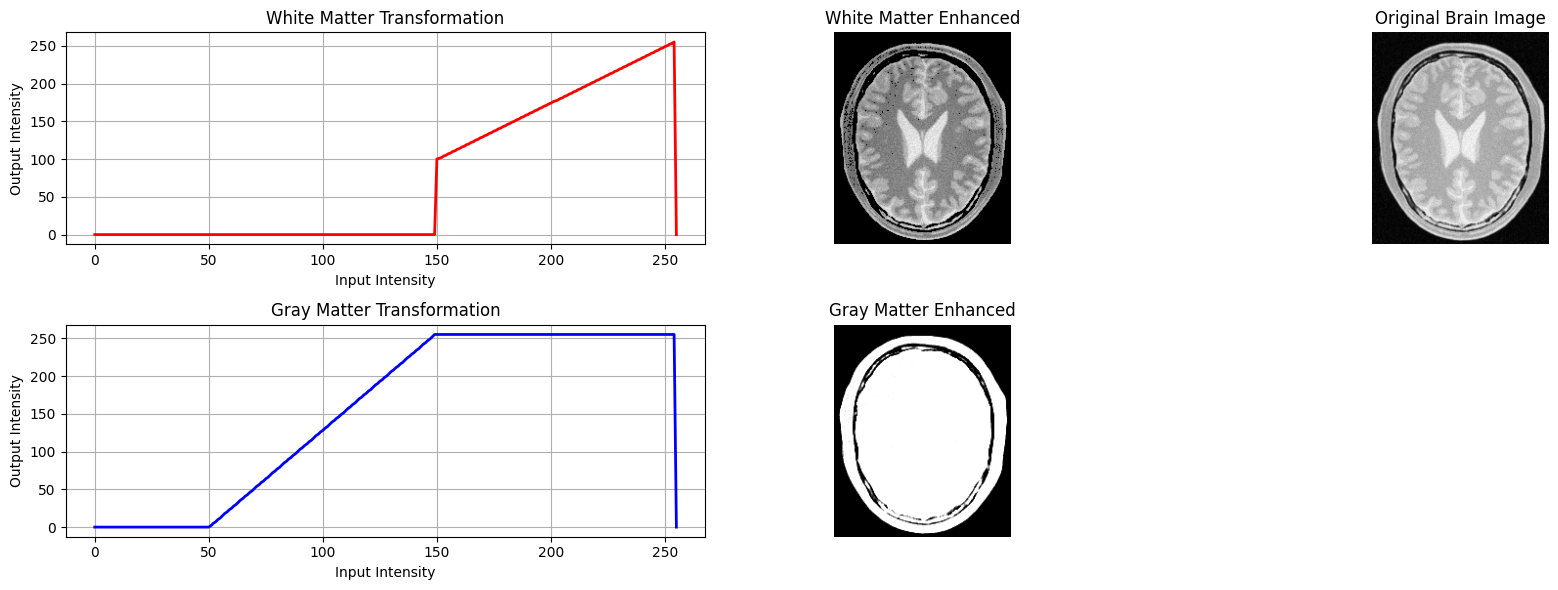

In [16]:
#2 question
def accentuate_white_matter(image):
    # enhance white matter
    lut = np.zeros(256, dtype=np.uint8)
    lut[150:255] = np.linspace(100, 255, 105).astype(np.uint8)
    return cv2.LUT(image, lut), lut

def accentuate_gray_matter(image):
    #enhance gray matter
    lut = np.zeros(256, dtype=np.uint8)
    lut[50:150] = np.linspace(0, 255, 100).astype(np.uint8)
    lut[150:255] = 255
    return cv2.LUT(image, lut), lut

brain_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/uom_cv/a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

white_enhanced, white_lut = accentuate_white_matter(brain_image)
gray_enhanced, gray_lut = accentuate_gray_matter(brain_image)

plt.figure(figsize=(18, 6))

plt.subplot(2, 3, 1)
plt.plot(range(256), white_lut, 'r-', linewidth=2)
plt.title('White Matter Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)


plt.subplot(2, 3, 2)
plt.imshow(white_enhanced, cmap='gray')
plt.title('White Matter Enhanced')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.plot(range(256), gray_lut, 'b-', linewidth=2)
plt.title('Gray Matter Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.imshow(gray_enhanced, cmap='gray')
plt.title('Gray Matter Enhanced')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(brain_image, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

plt.tight_layout()
plt.show()

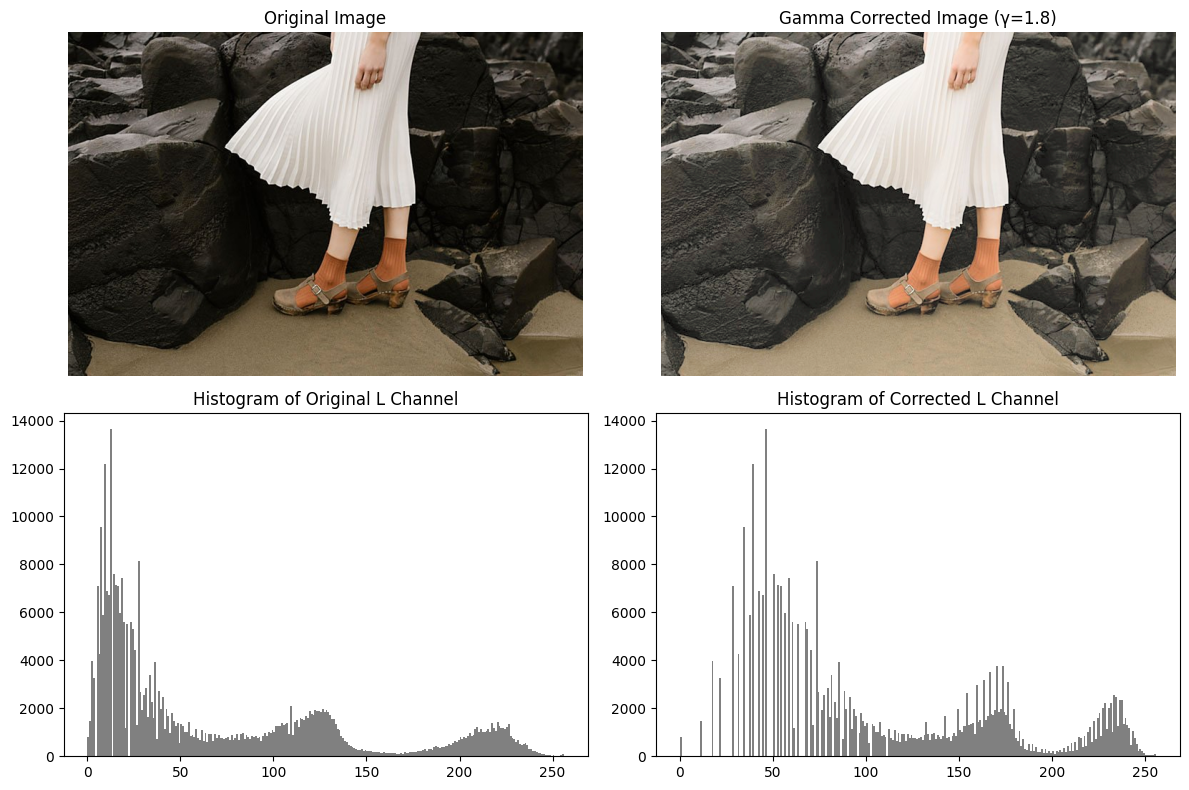

In [17]:
#3 question
image_path = "/content/drive/MyDrive/Colab Notebooks/uom_cv/a1images/highlights_and_shadows.jpg"  # update path if needed
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
L, a, b = cv2.split(lab_image)

# Normalize L channel to [0,1]
L_norm = L / 255.0

# Apply gamma correction
gamma = 1.8
L_corrected = np.power(L_norm, 1/gamma)
L_corrected = np.uint8(L_corrected * 255)

# Merge corrected L with original a and b
lab_corrected = cv2.merge([L_corrected, a, b])
corrected_image = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2RGB)


plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Corrected image
plt.subplot(2, 2, 2)
plt.imshow(corrected_image)
plt.title(f"Gamma Corrected Image (γ={gamma})")
plt.axis("off")


plt.subplot(2, 2, 3)
plt.hist(L.ravel(), bins=256, range=[0, 256], color='gray')
plt.title("Histogram of Original L Channel")


plt.subplot(2, 2, 4)
plt.hist(L_corrected.ravel(), bins=256, range=[0, 256], color='gray')
plt.title("Histogram of Corrected L Channel")

plt.tight_layout()
plt.show()


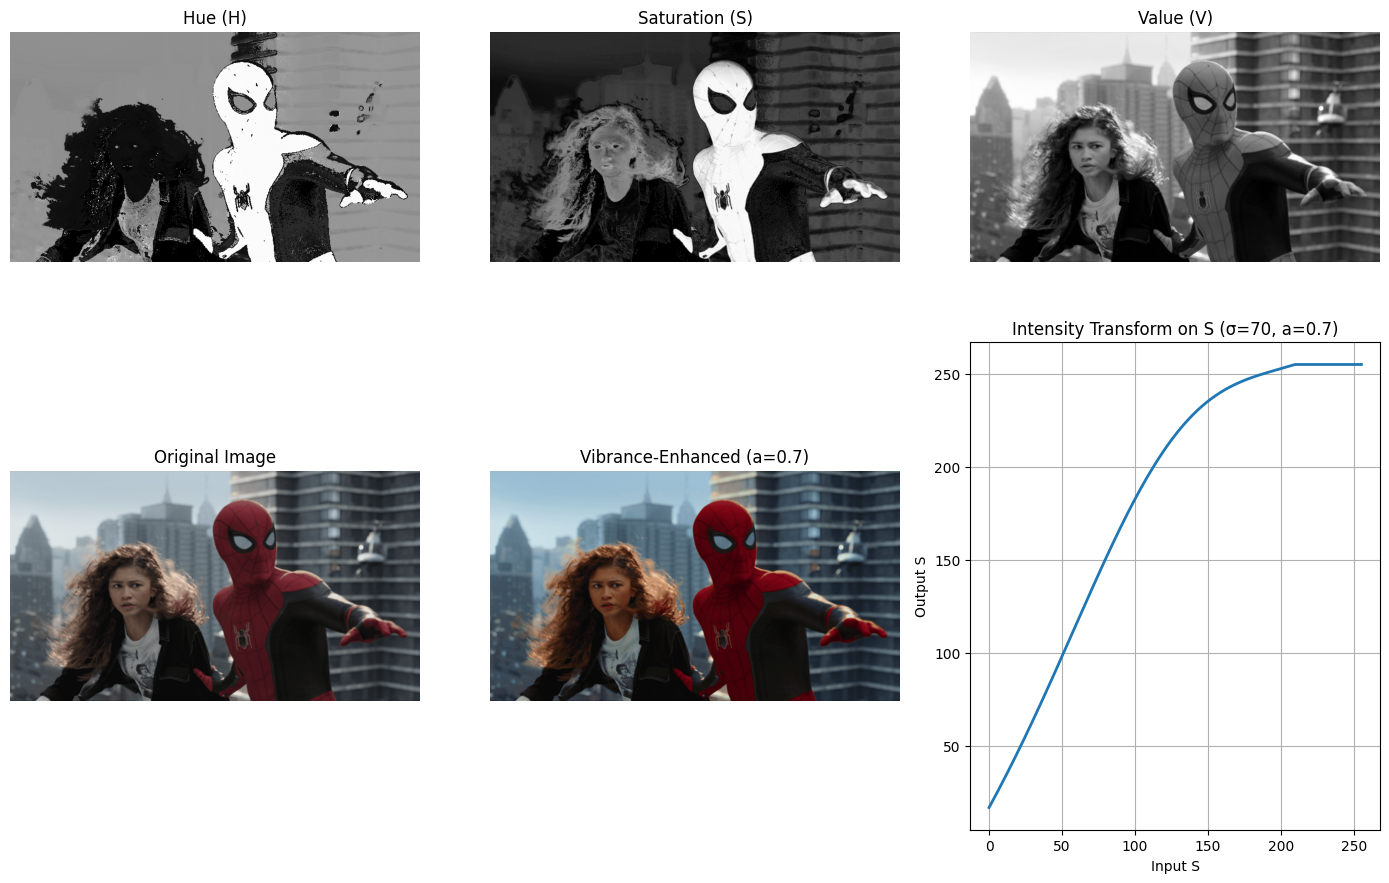

Reported value of a: 0.7


In [18]:
# 4 question
img_path = "/content/drive/MyDrive/Colab Notebooks/uom_cv/a1images/spider.png"
sigma = 70
a = 0.70

#(a)
img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
H, S, V = cv2.split(hsv)

#apply intensity transform
S_f = S.astype(np.float32)
gauss = 128.0 * np.exp(-((S_f - 128.0) ** 2) / (2.0 * (sigma ** 2)))
S_enh = np.minimum(S_f + a * gauss, 255.0).astype(np.uint8)

#recombine
hsv_enh = cv2.merge([H, S_enh, V])
img_enh = cv2.cvtColor(hsv_enh, cv2.COLOR_HSV2RGB)

#intensity transformation curve
x = np.arange(256, dtype=np.float32)
y = np.minimum(x + a * 128.0 * np.exp(-((x - 128.0) ** 2) / (2.0 * (sigma ** 2))), 255.0)

plt.figure(figsize=(14,10))

plt.subplot(2,3,1); plt.imshow(H, cmap='gray'); plt.title('Hue (H)'); plt.axis('off')
plt.subplot(2,3,2); plt.imshow(S, cmap='gray'); plt.title('Saturation (S)'); plt.axis('off')
plt.subplot(2,3,3); plt.imshow(V, cmap='gray'); plt.title('Value (V)'); plt.axis('off')

plt.subplot(2,3,4); plt.imshow(img_rgb); plt.title('Original Image'); plt.axis('off')
plt.subplot(2,3,5); plt.imshow(img_enh); plt.title(f'Vibrance-Enhanced (a={a})'); plt.axis('off')

plt.subplot(2,3,6); plt.plot(x, y, linewidth=2)
plt.title(f'Intensity Transform on S (σ={sigma}, a={a})')
plt.xlabel('Input S'); plt.ylabel('Output S'); plt.grid(True)

plt.tight_layout(); plt.show()

print(f"Reported value of a: {a}")

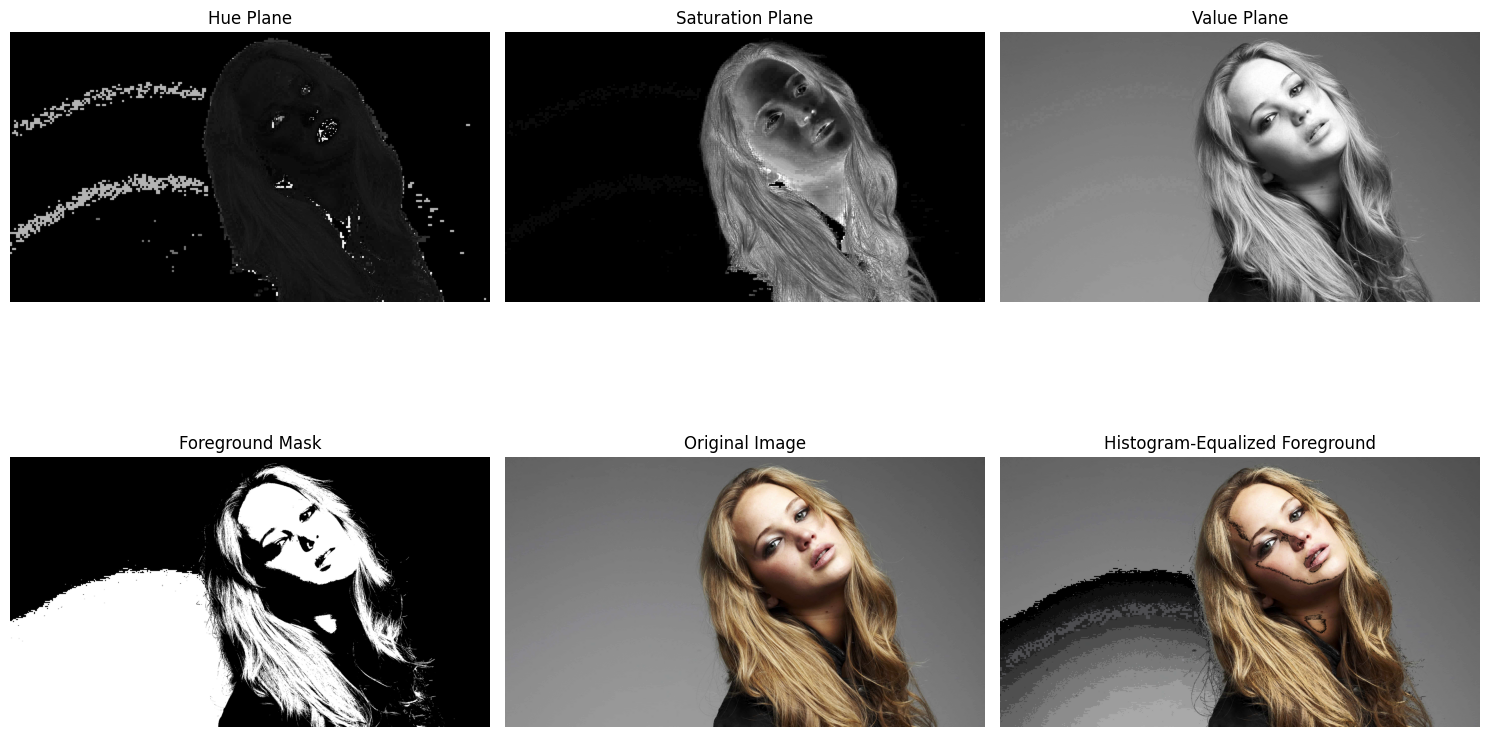

In [19]:
#5 question
image_path = "/content/drive/MyDrive/Colab Notebooks/uom_cv/a1images/jeniffer.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to HSV and split channels
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

# (b) Create mask from Value plane
_, mask = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#(c) Extract foreground using mask
foreground = cv2.bitwise_and(v, v, mask=mask)

#(d) Compute histogram and cumulative sum
hist, bins = np.histogram(foreground[mask > 0].ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

#(e) Histogram Equalization using formula
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
v_eq = cdf_final[v]

# Apply only on foreground
v_eq_masked = cv2.bitwise_and(v_eq, v_eq, mask=mask)

#(f) Combine with background
background = cv2.bitwise_and(v, v, mask=cv2.bitwise_not(mask))
v_final = cv2.add(v_eq_masked, background)

# Recombine HSV channels
hsv_final = cv2.merge([h, s, v_final])
result = cv2.cvtColor(hsv_final, cv2.COLOR_HSV2RGB)

# Display
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(h, cmap="gray")
plt.title("Hue Plane")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(s, cmap="gray")
plt.title("Saturation Plane")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(v, cmap="gray")
plt.title("Value Plane")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(mask, cmap="gray")
plt.title("Foreground Mask")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(result)
plt.title("Histogram-Equalized Foreground")
plt.axis("off")

plt.tight_layout()
plt.show()

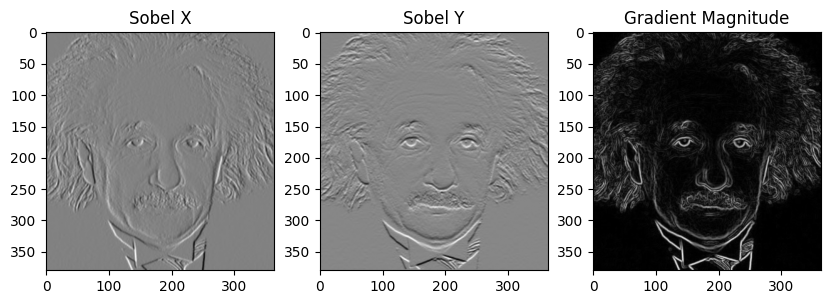

In [21]:
#6 question
#6(a)
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/uom_cv/a1images/einstein.png", cv2.IMREAD_GRAYSCALE)

# Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [0,  0,  0],
                    [1,  2,  1]], dtype=np.float32)

# Apply filter2D
grad_x = cv2.filter2D(img, cv2.CV_64F, sobel_x)
grad_y = cv2.filter2D(img, cv2.CV_64F, sobel_y)

# Magnitude of gradient
grad_mag = cv2.magnitude(grad_x, grad_y)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(grad_x, cmap='gray'), plt.title("Sobel X")
plt.subplot(1,3,2), plt.imshow(grad_y, cmap='gray'), plt.title("Sobel Y")
plt.subplot(1,3,3), plt.imshow(grad_mag, cmap='gray'), plt.title("Gradient Magnitude")
plt.show()

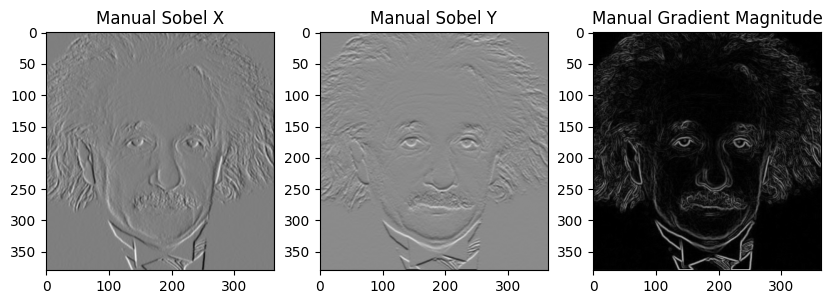

In [22]:
#6(b)
def convolve(img, kernel):
    h, w = img.shape
    kh, kw = kernel.shape
    pad = kh // 2
    padded = np.pad(img, pad, mode='constant')
    result = np.zeros_like(img, dtype=np.float32)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            result[i, j] = np.sum(region * kernel)
    return result

# Apply manually
grad_x_manual = convolve(img, sobel_x)
grad_y_manual = convolve(img, sobel_y)
grad_mag_manual = np.sqrt(grad_x_manual**2 + grad_y_manual**2)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(grad_x_manual, cmap='gray'), plt.title("Manual Sobel X")
plt.subplot(1,3,2), plt.imshow(grad_y_manual, cmap='gray'), plt.title("Manual Sobel Y")
plt.subplot(1,3,3), plt.imshow(grad_mag_manual, cmap='gray'), plt.title("Manual Gradient Magnitude")
plt.show()

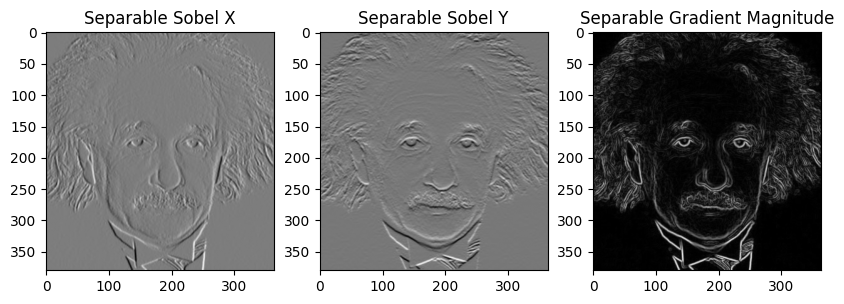

In [23]:
#6(C)
# Separable Sobel filters
gx1 = np.array([[1, 0, -1]], dtype=np.float32)
gx2 = np.array([[1], [2], [1]], dtype=np.float32)


temp = cv2.filter2D(img, cv2.CV_64F, gx1)
sobel_x_sep = cv2.filter2D(temp, cv2.CV_64F, gx2)

gy1 = np.array([[1], [0], [-1]], dtype=np.float32)
gy2 = np.array([[1, 2, 1]], dtype=np.float32)

temp = cv2.filter2D(img, cv2.CV_64F, gy2)
sobel_y_sep = cv2.filter2D(temp, cv2.CV_64F, gy1)

grad_mag_sep = cv2.magnitude(sobel_x_sep, sobel_y_sep)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(sobel_x_sep, cmap='gray'), plt.title("Separable Sobel X")
plt.subplot(1,3,2), plt.imshow(sobel_y_sep, cmap='gray'), plt.title("Separable Sobel Y")
plt.subplot(1,3,3), plt.imshow(grad_mag_sep, cmap='gray'), plt.title("Separable Gradient Magnitude")
plt.show()